In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd 
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import  hstack
from astropy.table import  vstack
from astropy.table import Column
from astropy.table import join
from astropy.table import unique
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

A quick test: take S82 SDSS qso light curves, store: first and last mag, calculate the difference between the two epochs... They're all in http://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern_format_LC.html

In [18]:
lcDir = '/Users/chris/GradResearch/CRTS_PROJECT/raw_LC_SDSS/QSO_S82/'
lcs  = os.listdir(lcDir)

Read in the Shen2008 catalog too...

In [12]:
# 9258 QSO ....  Shen2008
File = '../../CRTS_PROJECT/catalogs_SDSS/DB_QSO_S82.dat'
colnames = ['dbID', 'ra', 'dec', 'SDR5ID', 'M_i', 'M_i_corr', 'redshift',
                   'mass_BH', 'Lbol', 'u', 'g', 'r', 'i', 'z', 'Au']
dr5= Table.read(File, format='ascii', names = colnames)

327

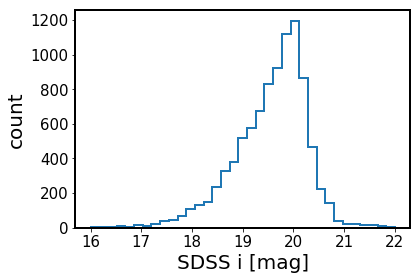

In [35]:
%matplotlib inline
plt.hist(dr5['i'],range=(16,22), histtype='step', lw=2, bins=35)
plt.xlabel('SDSS i [mag]')
plt.ylabel('count')
np.sum(dr5['i'] < 18)

Plot an example LC : 

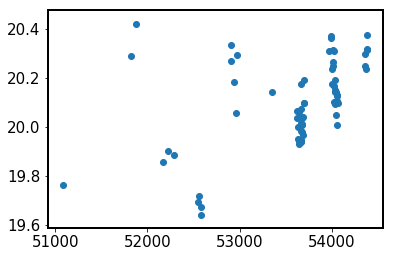

In [24]:
i = 80#for i in range(len(lcs)):
lc = Table.read(lcDir+lcs[i], format='ascii',
           names = ['MJD_u', 'u', 'u_err',
                   'MJD_g', 'g', 'g_err',
                   'MJD_r', 'r', 'r_err',
                   'MJD_i', 'i', 'i_err',
                   'MJD_z', 'z', 'z_err',
                    'ra_median', 'dec_median'
                   ])

m = lc['r'] > 0
plt.scatter(lc['MJD_r'][m], lc['r'][m])

In [19]:
For all light curves find the difference between early and late magnitudes. Ignore all ma

In [28]:
i1=[] ; i2=[]; i1err = []; i2err = []
mjd1 =[] ; mjd2 = []

for i in range(len(lcs)):
    if i % 1000 == 0 : print(i)    
    lc = Table.read(lcDir+lcs[i], format='ascii',
               names = ['MJD_u', 'u', 'u_err',
                       'MJD_g', 'g', 'g_err',
                       'MJD_r', 'r', 'r_err',
                       'MJD_i', 'i', 'i_err',
                       'MJD_z', 'z', 'z_err',
                        'ra_median', 'dec_median'
                       ])
    if len(lc)>0:
        m = (lc['i']>0)&(lc['i'] < 30)&(lc['MJD_i']>52000)
        if np.sum(m) > 1 : 
            i1.append(lc[m]['i'][0])
            i2.append(lc[m]['i'][-1])
            i1err.append(lc[m]['i_err'][0])
            i2err.append(lc[m]['i_err'][-1])
            mjd1.append(lc[m]['MJD_i'][0])
            mjd2.append(lc[m]['MJD_i'][-1])
        else:
            print('For lc %s there are only 2 i-band epochs'%lcs[i])
            
catalog = Table(data=[i1,i2,i1err, i2err, mjd1, mjd2], 
               names = ['i1','i2', 'i1err', 'i2err', 'mjd1', 'mjd2']
               )
catalog['dm'] = catalog['i2'] -catalog['i1']


# selection common to both versions of the catalog 

# these are not marked as non-existing,  but have unrealistic values  (v1&v2)
catalog.remove_rows(catalog['i2'] > 30)
# these have quite early mjd2: discard (v1&v2)
catalog.remove_rows(catalog['mjd2']<54300)

# selection only for v1
# these have weird mjd1 ... (v1)
#catalog.remove_rows(catalog['mjd1'] < 45000)
# these have quite late mjd1, so I discard these too . (v1)
#catalog.remove_rows(catalog['mjd1']> 51500)


# selection only for v2 
# remove the first year data... (v2)
catalog.remove_rows(catalog['mjd1'] < 51500)

catalog.write('SDSS_i2_i1_v1.txt', format='ascii')

0
1000
2000
3000
4000
5000
6000
7000
8000
For lc 2104983 there are only 2 i-band epochs
9000
For lc 131901 there are only 2 i-band epochs


median i2-i1=0.250
N=270
median i2-i1=0.014
N=1608
median i2-i1=-0.245
N=200
median i2-i1=0.047
N=1878
median i2-i1=-0.009
N=1808


(16, 20)

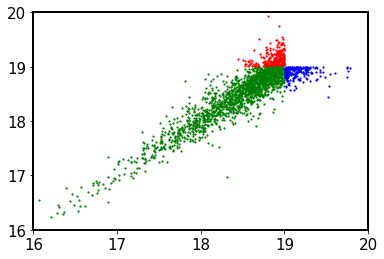

In [181]:
magCut  = 19
s = 1.4

m1 = (catalog['i1'] < magCut) *(catalog['i2'] > magCut)
m2 = (catalog['i1'] < magCut)*(catalog['i2'] < magCut)
m3 = (catalog['i1'] > magCut) *(catalog['i2'] < magCut)

for m,c in zip([m1,m2,m3], ['r','g','b']):
    plt.scatter(catalog['i1'][m], catalog['i2'][m], label='i1<19,i2>19',s=s,c=c)
    print('median i2-i1=%.3f'%np.median(catalog['i2'][m]-catalog['i1'][m]))
    print('N=%d'%len(catalog[m]))

    
for m in[m1|m2,  m3|m2]:
    print('median i2-i1=%.3f'%np.median(catalog['i2'][m]-catalog['i1'][m]))
    print('N=%d'%len(catalog[m]))    
    
plt.xlim(16,20)
plt.ylim(16,20)

(array([4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 6.682e+03]),
 array([8.62000000e-04, 5.10814527e+03, 1.02162897e+04, 1.53244341e+04,
        2.04325785e+04, 2.55407229e+04, 3.06488673e+04, 3.57570117e+04,
        4.08651561e+04, 4.59733005e+04, 5.10814449e+04]),
 <a list of 10 Patch objects>)

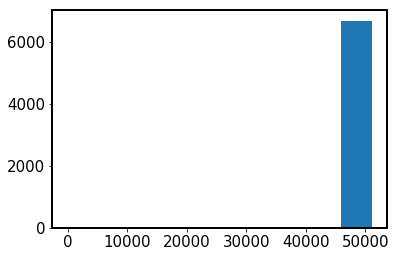

In [133]:
plt.hist(catalog['mjd1'])

(array([8.54323849e-03, 3.41729540e-02, 8.54323849e-03, 0.00000000e+00,
        1.62321531e-01, 1.74282065e+00, 1.36691816e-01, 2.15118745e+01,
        1.76845037e+00, 3.17125013e+01]),
 array([8.96717192, 8.98468937, 9.00220683, 9.01972428, 9.03724174,
        9.05475919, 9.07227664, 9.0897941 , 9.10731155, 9.12482901,
        9.14234646]),
 <a list of 10 Patch objects>)

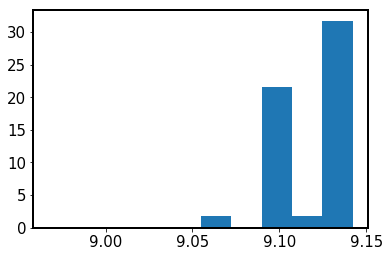

In [87]:
plt.hist((catalog['mjd2']-catalog['mjd1'])/365,  density=True)


In [129]:
np.median(catalog['mjd2'] - catalog['mjd1'])/365

9.125951730136986

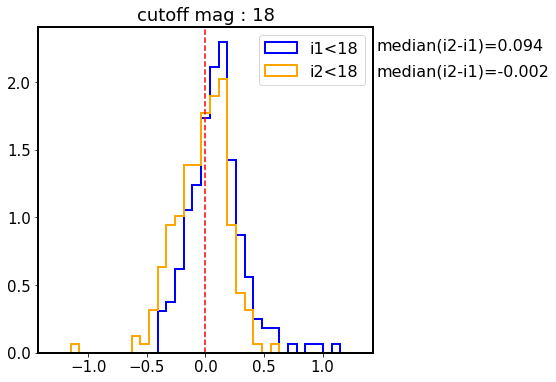

In [170]:
fig,ax = plt.subplots(1,1,figsize=(6,6))

magCut  = 18
m1 = catalog['i1'] < magCut
m2 = catalog['i2'] < magCut

y0 = 0.93
x0 = 1.01
dy = 0.08
font = 16
i = 0 
for m, c, l in zip([m1,m2], ['blue','orange'], ['i1<%d'%magCut, 'i2<%d'%magCut]):
    ax.hist(catalog['dm'][m],histtype='step',lw=2,color=c, bins=35, density=True,
           range=(-1.3,1.3),label=l)
    ax.text(x0,y0-i * dy, 'median(i2-i1)=%.3f'%(np.median(catalog['dm'][m])),
                    transform=ax.transAxes, fontsize=font)
    i +=1 
ax.axvline(0, ls='--',c='r')
ax.legend(fontsize=16)
ax.set_title('cutoff mag : %d'%magCut)
plt.savefig('SDSS_QSO_dmag_experiment_i_lt_'+str(magCut)+'.png',
           bbox_inches='tight')

In [ ]:
catalog[catalog['dm']> 2]


In [2]:
import numpy as np

Run this SDSS code on the simulated catalogs ... 

Take first (r1) and last(r2) magnitude. Select by r1<19 or r2<19,  plot r1-r2 for all lightcurves...

In [3]:
Npts= 1000 # number of points per simulated 20-year light curve 
fSfinf = '1.5' # factor augmenting the SFr derived from paper2 relations using catalog Mi, MBH
fSample = '10' # number of light curves simulated for each catalog value of Mi, MBh, rSEED 
name = str(Npts)+'pts_'+fSfinf+'SFr' + fSample + 'x-increase_SDSS_err'
fname = 'catalog_'+name+'.txt'
catalog = Table.read('../catalogs/'+fname, format='ascii')

In [6]:
catalog['dm'] = catalog['r20yr'] - catalog['r0yr']


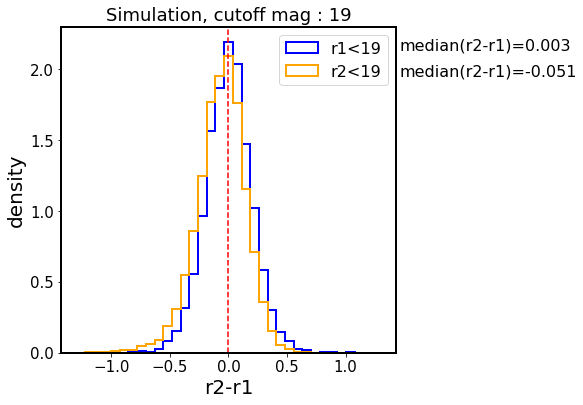

In [17]:
%matplotlib inline
fig,ax = plt.subplots(1,1,figsize=(6,6))

magCut  = 19
m1 = catalog['r0yr'] < magCut
m2 = catalog['r20yr'] < magCut

y0 = 0.93
x0 = 1.01
dy = 0.08
font = 16
i = 0 
for m, c, l in zip([m1,m2], ['blue','orange'], ['r1<%d'%magCut, 'r2<%d'%magCut]):
    ax.hist(catalog['dm'][m],histtype='step',lw=2,color=c, bins=35, density=True,
           range=(-1.3,1.3),label=l)
    ax.text(x0,y0-i * dy, 'median(r2-r1)=%.3f'%(np.median(catalog['dm'][m])),
                    transform=ax.transAxes, fontsize=font)
    i +=1 
ax.axvline(0, ls='--',c='r')
ax.legend(fontsize=16)
ax.set_title('Simulation, cutoff mag : %d'%magCut)
ax.set_xlabel('r2-r1')
ax.set_ylabel('density')
plt.savefig('Simulated_QSO_dmag_experiment_r_lt_'+str(magCut)+'.png',
           bbox_inches='tight')

median r2-r1=0.229
N=894
median r2-r1=-0.019
N=8521
median r2-r1=-0.290
N=1378
median r2-r1=0.003
N=9415
median r2-r1=-0.051
N=9899


(16, 20)

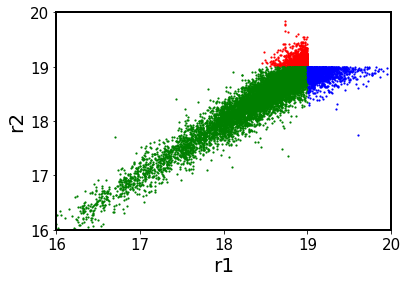

In [14]:
magCut  = 19
s = 1.4

m1 = (catalog['r0yr'] < magCut) *(catalog['r20yr'] > magCut)
m2 = (catalog['r0yr'] < magCut) *(catalog['r20yr'] < magCut)
m3 = (catalog['r0yr'] > magCut) *(catalog['r20yr'] < magCut)

for m,c in zip([m1,m2,m3], ['r','g','b']):
    plt.scatter(catalog['r0yr'][m], catalog['r20yr'][m],s=s,c=c)
    print('median r2-r1=%.3f'%np.median(catalog['r20yr'][m]-catalog['r0yr'][m]))
    print('N=%d'%len(catalog[m]))

plt.ylabel('r2')
plt.xlabel('r1')
for m in[m1|m2,  m3|m2]:
    print('median r2-r1=%.3f'%np.median(catalog['r20yr'][m]-catalog['r0yr'][m]))
    print('N=%d'%len(catalog[m]))    
    
plt.xlim(16,20)
plt.ylim(16,20)